# ΕΙΣΑΓΩΓΗ


Είναι σύνηθες πλέον να χρησιμοποιούμε τεχνικές τεχνητής νοημοσύνης για να διευκολύνουμε την καθημερινότητα μας ΄ή και να βρίσκουμε λύσεις σε προβλήματα όπου ένα ανθρώπινο μυαλό θα ήταν αρκετά χρονοβόρο έως και αδύνατον να δώσει. Η ανάγκη για την δημιουργία  μοντέλων  τα οποία λειτουργούν ως ταξινομητές. προήλθε από το γεγονός ότι έχουν πληθώρα εφαρμογών. Π.χ:

    α)Διαχωρισμός των emails με βάση την επικεφαλίδα τους ή το περιεχόμενο.
    β)Πρόβλεψή καρκινικών κυττάρων χαρακτηρίζοντας τα ως καλοήθη η κακοήθη.
    
Αυτό που καλούμαστε εμείς να κάνουμε είναι μέσα από τα δεδομένα που μας δίνονται από αρχείο excel να καταφέρουμε να φτιάξουμε ένα μοντέλο το οποίο: 



    1) θα μπορεί να βρίσκει με ποσοστό επιτυχίας τουλάχιστον 62 % τις εταιρείες που θα πτωχεύσουν.

    2) θα μπορεί να βρίσκει με ποσοστό επιτυχίας τουλάχιστον 70 % τις εταιρείες που δεν θα πτωχεύσουν.

Οι παρατηρήσεις για την κάθε εταιρία είναι οι παρακάτω:

• Οι δείκτες απόδοσηςτων εταιρειών (στήλες Α έως και Η) 
      
    1) 365* ( Β.Υ / Κοστ.Πωλ )
    2) Λειτ.Αποτ/Συν.Ενεργ. (ROA)
    3) ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ
    4)  ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ
    5) (ΑΠΑΙΤ.*365) / ΠΩΛ.
    6) Συν.Υποχρ/Συν.Ενεργ
    7) Διάρκεια Παραμονής Αποθεμάτων
    8) Λογαριθμος Προσωπικού
       
• Τρεις δυϊκοί δείκτες δραστηριοτήτων (στήλες I, J, K) 
      
    9) ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ 
    10) ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ
    11) ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ

12) Η κατάσταση της εταιρείας (1 όλα καλά, 2 έχει κηρύξει χρεωκοπία) 

13) Το έτοςστο οποίο αφορούν τα ως άνω μεγέθη. 

Αποφάσισα να υλοποιήσω 7 μοντέλα ταξινομητών τα οποία είναι τα παρακάτω:

    1. Λογιστική Παλινδρόμηση (Logistic Regression) 
    2. Δέντρα Απόφασης(Decision Trees) 
    3. Κ –Πλησιέστεροι Γείτονες (k-­‐Nearest Neighbors 
    4. Γραμμική Διακριτική Ανάλυση (Linear Discriminant Analysis) 
    5. Ταξινομητής Naïve Bayes 
    6. Μηχανές ΔιανυσμάτωνΥποστήριξης (Support Vector Machines) 
    7. Τεχνητά Νευρωνικά Δίκτυα(Artificial Neural Networks) 
    
Για να μετρήσουμε την απόδοση του κάθε μοντέλου θα χρησιμοποιούμε τις παρακάτω συναρτήσεις.

    1. Precision: πόσα από τα παραδείγματα που το μοντέλο υπολόγισε ότι ανήκαν στην ομάδα Χ, ανήκαν όντως στην ομάδα Χ. 
    2. Recall: από το σύνολο των παραδειγμάτων που ανήκαν στην ομάδα Χ, πόσα ανέκτησε το μοντέλο. 
    3. F1 score: αρμονικός μέσος των precision και recall. Βοηθά στο να έχουμε μια γενική ιδέα της απόδοσης του μοντέλου. 


Εισαγωγή των απαραίτητων βιβλιοθηκών.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd # excel reading
import matplotlib.pyplot as plt
import sklearn # we need this for the classifiers
import keras # artificial neural networks (it uses tensorflow)

#for the coreletion
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
# display 2 decimal points
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format


Using TensorFlow backend.


In [2]:
columns = ['Classifier Name', 'Training or test set', 'Number of training samples',
           'Number of non-healthy companies in training sample', 'TP', 'TN', 'FP',
           'FN', 'Precision', 'Recall', 'F1 score', 'Accuracy']

results_DF = pd.DataFrame(columns=columns)


# read the data
fileName = 'Inputs\\Dataset2Use_Assignment2.xlsx' 

In [3]:
try:
    # Confirm file exists.
    sheetValues = pd.read_excel(fileName)
    print(' .. successful parsing of file:', fileName)
    # print("Column headings:")
    # print(sheetValues.columns)
except FileNotFoundError:
    print(FileNotFoundError)

 .. successful parsing of file: Inputs\Dataset2Use_Assignment2.xlsx


# ΜΕΘΟΔΟΙ






Το πρώτο βήμα  είναι να προετοιμάσουμε τα δεδομένα μας για να τα εισάγουμε στα μοντέλα.

In [4]:
sheetValues[sheetValues.columns[:7]].head()

,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων
0,"1,014.13",0.01,0.04,0.97,567.87,0.53,545.20
1,561.97,0.10,0.02,1.42,335.92,0.66,7.95
2,826.92,0.01,0.09,1.58,350.62,0.55,28.60
3,493.18,0.20,0.00,1.35,414.51,0.68,1.22
4,100.42,0.18,0.00,3.30,118.55,0.25,52.35


Παρατηρούμε ότι  για τα πρώτα 5 παραδείγματα μας τα κλειστά σύνολα που παίρνει τιμές η κάθε στήλη, έχουν τεράστια απόκλιση μεταξύ τους. Επειδή δεν μπορούμε να ελέγξουμε  και τα 10000 παραδείγματα πάμε να ελέγξουμε για την κάθε στήλη πιο είναι το ελάχιστο και πιο το μέγιστο. 

In [5]:
sheetValues[sheetValues.columns[:7]].agg([min, max])

,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων
min,0.65,-0.60,0.00,0.00,0.00,0.00,0.00
max,"1,500.00",0.50,0.20,5.00,"1,200.00",1.67,"1,332.11"



Αν αφήσουμε τα δεδομένα ως έχουν οι δείκτες με την μεγαλύτερη κλίμακα θα επηρεάσουν δραματικά περισσότερο το αποτέλεσμα, χωρίς όμως να έχουμε κάποια ένδειξη  ότι αυτή η παρατήρηση είναι πιο σημαντική σε σχέση με τις άλλες. Για να αποτρέψουμε να συμβεί κάτι τέτοιο θα κατανείμουμε τα δεδομένα μας στην ιδία κλίμακα [0,1]. 

In [6]:
inputData = sheetValues[sheetValues.columns[:-2]].values

#now convert the categorical values to unique class id and save the name-to-id match
outputData = sheetValues[sheetValues.columns[-2]]
outputData, levels = pd.factorize(outputData)

In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(inputData)
inputData = pd.DataFrame(x_scaled)

In [8]:
inputData[inputData.columns[:7]].head()

,0,1,2,3,4,5,6
0,0.68,0.56,0.19,0.19,0.47,0.32,0.41
1,0.37,0.64,0.08,0.28,0.28,0.40,0.01
2,0.55,0.55,0.47,0.31,0.29,0.33,0.02
3,0.33,0.72,0.00,0.27,0.35,0.41,0.00
4,0.07,0.71,0.00,0.66,0.10,0.15,0.04


In [9]:
inputData.agg([min, max])

,0,1,2,3,4,5,6,7,8,9,10
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Το επόμενο βήμα είναι να δούμε αν υπάρχει κάποια γραμμική συσχέτιση ανάμεσα στις παρατηρήσεις. 

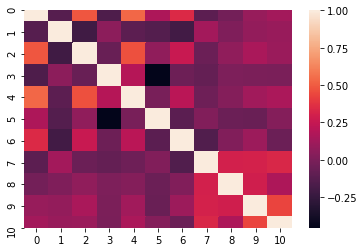

In [10]:
corr = inputData.corr()
sns.heatmap(corr)
plt.show()

Παρατηρούμε ότι η συσχέτιση είναι χαμηλή (< 0,75).  Και δεν μπορούμε να επωφεληθούμε από αυτό.

Επειδή θα υλοποιήσουμε πολλά μοντέλα και δεν θέλουμε ο κώδικας μας να γίνει χαοτικός, θα φτιάξουμε μια συνάρτηση η οποία θα δέχεται το όνομα του μοντέλου και την πρόβλεψη που έκανε το μοντέλο για την είσοδο εκπαίδευσης και την είσοδο επαλήθευσης. Άκοπος αυτής της συνάρτησης είναι να υπολογίζει τις μετρικές για το κάθε μοντέλο και να τις εισάγει στο dataFrame  results_DF ώστε στο τέλος του κωδικά να σώζουμε το dataFrame σε ένα αρχείο excel.

In [11]:

def CalculateScores (model_name, y_pred_train, y_pred_test):
    """
    Function that calculate the score for each model and add the result results_DF dataFrame.

    """
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    pre_train = precision_score(y_train, y_pred_train, average='macro')
    pre_test = precision_score(y_test, y_pred_test, average='macro')
    rec_train = recall_score(y_train, y_pred_train, average='macro')
    rec_test = recall_score(y_test, y_pred_test, average='macro')
    f1_train = f1_score(y_train, y_pred_train, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

    #train
    results_DF.loc[len(results_DF)] = [model_name] + ['Train'] \
                                      + [len(y_train)] + [np.count_nonzero(y_train)]\
                                      + [tp_train] + [tn_train] \
                                      + [fp_train] + [fn_train] + [pre_train]\
                                      + [rec_train] + [f1_train] + [acc_train]
    #test
    results_DF.loc[len(results_DF)] = [model_name] + ['Test'] \
                                      + [len(y_test)] + [np.count_nonzero(y_test)] \
                                      + [tp_test] + [tn_test] \
                                      + [fp_test] + [fn_test] + [pre_test] \
                                      + [rec_test] + [f1_test] + [acc_test]


Όπως θα δούμε και παρακάτω θα χρειαστεί να επεξεργαστούμε περαιτέρω τα δεδομένα μας και για να μην γράφουμε πολλές φόρες των ίδιο κώδικα, φτιάχνουμε την παρακάτω συνάρτηση η οποία δημιουργεί τα μοντέλα και κάνει fit τα δεδομένα.

In [12]:
def RunModels (X_train, y_train, X_test):
    
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train) #fit the model using the training data
    #now check for both train and test data, how well the model learned the patterns
    CalculateScores('Logistic Regression',
                    logreg.predict(X_train), logreg.predict(X_test))
    
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train) #fit the model using the training data
    #now check for both train and test data, how well the model learned the patterns
    CalculateScores('Decision Tree', 
                    clf.predict(X_train), clf.predict(X_test))
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train) #fit the model using the training data
    #now check for both train and test data, how well the model learned the patterns
    CalculateScores('KNeighbors',
                    knn.predict(X_train), knn.predict(X_test))
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train) #fit the model using the training data
    #now check for both train and test data, how well the model learned the patterns
    CalculateScores('Linear Discriminant',
                    lda.predict(X_train), lda.predict(X_test))
    
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train) #fit the model using the training data
    # now check for both train and test data, how well the model learned the patterns
    CalculateScores('GaussianNB', 
                    gnb.predict(X_train), gnb.predict(X_test))
    
    from sklearn.svm import SVC
    svm = SVC()
    svm.fit(X_train, y_train) #fit the model using the training data
    # now check for both train and test data, how well the model learned the patterns
    CalculateScores('SVC', svm.predict(X_train), 
                    svm.predict(X_test))
    
    CustomModel = keras.models.Sequential()
    CustomModel.add(keras.layers.Dense(10, 
                                       input_dim=X_train.shape[1], 
                                       activation='relu'))
    CustomModel.add(keras.layers.Dense(2, activation='softmax'))
    #display the architecture
    #CustomModel.summary()
    #compile model using accuracy to measure model performance
    CustomModel.compile(optimizer='adam',
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])
    #train the model
    CustomModel.fit(X_train, 
                    keras.utils.np_utils.to_categorical(y_train), 
                    epochs=100, verbose=False)
    CalculateScores('ANN', 
                    CustomModel.predict_classes(X_train), 
                    CustomModel.predict_classes(X_test))

    

Διαχωρισμός των δεδομένων σε test set και train set 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputData,
                                                    outputData, 
                                                    test_size=0.3, 
                                                    random_state=0)


In [ ]:
#from keras.utils.np_utils import to_categorical

In [14]:
%%time

RunModels(X_train, y_train, X_test)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Wall time: 41.1 s


In [15]:
results_DF

,Classifier Name,Training or test set,Number of training samples,Number of non-healthy companies in training sample,TP,TN,FP,FN,Precision,Recall,F1 score,Accuracy
0,Logistic Regression,Train,7501,161,0,7340,0,161,0.49,0.50,0.49,0.98
1,Logistic Regression,Test,3215,87,0,3128,0,87,0.49,0.50,0.49,0.97
2,Decision Tree,Train,7501,161,161,7340,0,0,1.00,1.00,1.00,1.00
3,Decision Tree,Test,3215,87,4,3066,62,83,0.52,0.51,0.51,0.95
4,KNeighbors,Train,7501,161,16,7333,7,145,0.84,0.55,0.58,0.98
5,KNeighbors,Test,3215,87,2,3125,3,85,0.69,0.51,0.51,0.97
6,Linear Discriminant,Train,7501,161,9,7266,74,152,0.54,0.52,0.53,0.97
7,Linear Discriminant,Test,3215,87,6,3094,34,81,0.56,0.53,0.54,0.96
8,GaussianNB,Train,7501,161,41,6930,410,120,0.54,0.60,0.55,0.93
9,GaussianNB,Test,3215,87,21,2968,160,66,0.55,0.60,0.56,0.93


Από τις παραπάνω μετρικές καταλαβαίνουμε ότι όλα τα μοντέλα μας έχουν την **τάση  να κατατάσουν τις εισόδους στην κλάση των υγειών επιχειρήσεων**, έτσι έχουμε περίπου 50% ποσοστό επιτυχίας, το ίδιο ποσοστό επιτυχίας με το αν μαντεύαμε εμείς οι ίδιοι αν μια εταιρεία θα χρεοκοπήσει η όχι. 

Θα πρέπει να ξανά παρατηρήσουμε τα δεδομένα μας για να δούμε που βρίσκετε το πρόβλημα. Πάμε λοιπόν να ελέγξουμε τι ποσοστό των παραδειγμάτων που κατέχει η κάθε κλάση.

In [16]:
print(' .. we have', inputData.shape[0], 'available paradigms.')

print(' ... the distribution for the available class lebels is:')
np.unique(outputData)
for classIdx in range(0, len(np.unique(outputData))):
    tmpCount = sum(outputData == classIdx)
    tmpPercentage = tmpCount/len(outputData)
    print(' .. class', classIdx, 'has', 
          tmpCount, 'instances', '(', '{:.2f}'.format(tmpPercentage), '%)')




 .. we have 10716 available paradigms.
 ... the distribution for the available class lebels is:
 .. class 0 has 10468 instances ( 0.98 %)
 .. class 1 has 248 instances ( 0.02 %)


Μόνο το 0,02% των δεδομένων ανήκουν σε παραδείγματα χρεοκοπημένων εταιρειών. 
Αυτό το είδος των βάσεων είναι γνωστό ως **unbalnced databaseis**. 
Οι περισσότεροι αλγόριθμοι λειτουργούν καλύτερα όταν τα δεδομένα για την κάθε κλάση είναι περίπου ίσα. Αυτό συμβαίνει επειδή οι περισσότεροι αλγόριθμοι έχουν σχεδιαστεί για να μεγιστοποιούν την ακρίβεια και να μειώνουν το σφάλμα

Για να αντιμετωπίσουμε αυτό το πρόβλημα θα παρουσιάσουμε 3 τεχνικές.

## Under Sampling

Διαγραφή τυχαίων δεδομένων τα οποία ανήκουν στην κλάση με τα περισσότερα δεδομένα ώστε να φτάσουμε σε μια αναλογία 3 προς 1. Από την στιγμή που δεν διαγράφουμε με κάποιο κριτήριο είναι πολύ πιθανό να διαγράψουμε κάποια παρατήρηση η οποία μπορεί να επηρέαζε σε μεγάλο βαθμό την έξοδο.
    


Πάμε λοιπόν να επεξεργαστούμε το dataset ωστε για κάθε 3 υγιείς επιχείρησής θα υπάρχει 1 χρεοκοπημένη. Για να το πετύχουμε θα πρέπει να διαγράψουμε το 93% των παραδειγμάτων που ανήκουν στις υγιείς επιχειρήσεις.

*Να σημειώσω εδώ ότι για λόγους ευκολίας μετονόμασα την στήλη που δήλωνε την κατάσταση της εταιρείας σε fold.*



In [17]:
fileName = 'Inputs\\Dataset2Use_Assignment2.xlsx' # you may add the full path here

try:
    # Confirm file exists.
    df = pd.read_excel(fileName)
    print(' .. successful parsing of file:', fileName)
    # print("Column headings:")
    # print(sheetValues.columns)
except FileNotFoundError:
    print(FileNotFoundError)

 .. successful parsing of file: Inputs\Dataset2Use_Assignment2.xlsx


In [18]:
df.drop(df[df['fold'] == 1].sample(frac=.9289).index, inplace=True)

In [19]:
outputData = df[sheetValues.columns[-2]]
outputData, levels = pd.factorize(outputData)
print(' .. we have', df.shape[0], 'available paradigms.')
print(' .. each paradigm has', df.shape[1], 'features')
print(' ... the distribution for the available class lebels is:')
for classIdx in range(0, len(np.unique(outputData))):
    tmpCount = sum(outputData == classIdx)
    tmpPercentage = tmpCount/len(outputData)
    print(' .. class', 
          classIdx, 'has', tmpCount, 
          'instances', 
          '(', '{:.2f}'.format(tmpPercentage), '%)')


 .. we have 992 available paradigms.
 .. each paradigm has 13 features
 ... the distribution for the available class lebels is:
 .. class 0 has 744 instances ( 0.75 %)
 .. class 1 has 248 instances ( 0.25 %)


Σώζουμε τα δεδομένα μας σε excel.
Θα πρέπει να μην ξεχάσουμε να δηλώσουμε ότι δεν θέλουμε να γράψουμε και τον δείκτη στο excel διότι θα λαμβάναμε και των δείκτη ως παρατήρηση.

In [20]:
df.head()

,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων,Λογαριθμος Προσωπικού,ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ,fold,ΕΤΟΣ
13,450.44,0.08,0.01,0.58,133.19,0.77,50.95,1.04,1,1,0,1,2006
17,286.48,0.12,0.01,1.03,44.40,0.30,94.79,0.30,0,1,1,1,2006
22,572.51,0.00,0.09,0.86,404.27,0.96,83.13,0.00,0,0,0,2,2006
24,304.03,-0.00,0.03,0.66,106.29,0.67,85.36,1.49,0,1,0,2,2006
34,162.14,-0.13,0.04,3.42,198.87,0.63,179.58,1.51,1,1,0,1,2006


In [21]:
df.to_excel ('Inputs\\Dataset_reduced_healty_3over1.xlsx',index=False)

Πάμε λοιπόν να δούμε την διαφορά στην απόδοση. 

In [22]:
fileName = 'Inputs\\Dataset_reduced_healty_3over1.xlsx' # you may add the full path here

try:
    # Confirm file exists.
    sheetValues = pd.read_excel(fileName)
    print(' .. successful parsing of file:', fileName)
    # print("Column headings:")
    # print(sheetValues.columns)
except FileNotFoundError:
    print(FileNotFoundError)

 .. successful parsing of file: Inputs\Dataset_reduced_healty_3over1.xlsx


In [23]:
results_DF = pd.DataFrame(columns=columns)

In [24]:
#create the input array with values
#fisrt get only the numeric values; i.e. ignore the two last column, and convert it to ndarray
inputData = sheetValues[sheetValues.columns[:-2]].values

#now convert the categorical values to unique class id and save the name-to-id match
outputData = sheetValues[sheetValues.columns[-2]]
outputData, levels = pd.factorize(outputData)

In [25]:
#normalize the feature values
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(inputData)
inputData = pd.DataFrame(x_scaled)

In [26]:
#now create train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputData,
                                                    outputData,
                                                    test_size=0.25,
                                                    random_state=0)


In [27]:
%%time
RunModels(X_train, y_train, X_test)

Wall time: 4.38 s


In [28]:
results_DF

,Classifier Name,Training or test set,Number of training samples,Number of non-healthy companies in training sample,TP,TN,FP,FN,Precision,Recall,F1 score,Accuracy
0,Logistic Regression,Train,744,178,66,543,23,112,0.79,0.67,0.69,0.82
1,Logistic Regression,Test,248,70,23,168,10,47,0.74,0.64,0.65,0.77
2,Decision Tree,Train,744,178,178,566,0,0,1.00,1.00,1.00,1.00
3,Decision Tree,Test,248,70,33,151,27,37,0.68,0.66,0.67,0.74
4,KNeighbors,Train,744,178,100,541,25,78,0.84,0.76,0.79,0.86
5,KNeighbors,Test,248,70,27,162,16,43,0.71,0.65,0.66,0.76
6,Linear Discriminant,Train,744,178,76,537,29,102,0.78,0.69,0.71,0.82
7,Linear Discriminant,Test,248,70,27,168,10,43,0.76,0.66,0.68,0.79
8,GaussianNB,Train,744,178,85,511,55,93,0.73,0.69,0.70,0.80
9,GaussianNB,Test,248,70,32,161,17,38,0.73,0.68,0.70,0.78


Βλέπουμε ότι όλα τα μοντέλα έχουν καλύτερη απόδοση.


## Oversampling


Μια άλλη λύση για να αντιμετωπίσουμε το πρόβλημα των δυσανάλογων κλάσεων, είναι να δημιουργήσουμε αντίγραφα από παρατηρήσεις οι οποίες ανήκουν στην κλάση των εταιριών που πτωχεύσαν. Η επιλογή θα γίνει με τυχαίο τρόπο.

**Είναι πολύ σημαντικό να χωρίσουμε τα δεδομένα μας σε είσοδο και έξοδο πριν εφαρμόσουμε αυτή την τεχνική.** Αν δεν το κάναμε αυτό θα υπήρχε η περίπτωση μια η περισσότερες είσοδοι να βρισκόταν και στο trainig set και στο test set. Κάτι τέτοιο θα προκαλούσε υπερεκπαίδευση χαμηλή γενίκευση. 

Πάμε λοιπόν να επεξεργαστούμε το dataset ώστε να πετύχουμε κατανομή 50-50.

In [29]:
results_DF = pd.DataFrame(columns=columns)

fileName = 'Inputs\\Dataset2Use_Assignment2.xlsx' # you may add the full path here

try:
    # Confirm file exists.
    df = pd.read_excel(fileName)
    print(' .. successful parsing of file:', fileName)
    # print("Column headings:")
    # print(sheetValues.columns)
except FileNotFoundError:
    print(FileNotFoundError)

 .. successful parsing of file: Inputs\Dataset2Use_Assignment2.xlsx


In [30]:
#fisrt get only the numeric values; i.e. ignore last column, and convert it to ndarray
inputData = df[df.columns[:-2]].values

#now convert the categorical values to unique class id and save the name-to-id match
outputData = df[df.columns[-2]]
outputData, levels = pd.factorize(outputData)

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(inputData)
inputData = pd.DataFrame(x_scaled)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputData,
                                                    outputData,
                                                    test_size=0.25,
                                                    random_state=0)


In [33]:
# concatenate our training data back together
X = X_train
X['fold'] = y_train

In [34]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,fold
8688,0.44,0.56,0.11,0.25,0.39,0.39,0.02,0.33,0.00,0.00,0.00,0
9399,0.44,0.56,0.35,0.14,0.00,0.53,0.10,0.33,0.00,1.00,1.00,0
10243,0.14,0.57,0.11,0.24,0.17,0.36,0.02,0.16,0.00,0.00,0.00,0
1362,0.28,0.56,0.14,0.11,0.12,0.46,0.13,0.10,0.00,0.00,0.00,0
8296,1.00,0.55,0.06,0.18,0.88,0.58,0.14,0.39,0.00,1.00,1.00,0


In [35]:
# separate minority and majority classes
open = X[X['fold'] == 0]
closed = X[X['fold'] == 1]

In [36]:
from sklearn.utils import resample
# upsample minority
closed_upsampled = resample(closed,
                          replace=True, # sample with replacement
                          n_samples=len(open), # match number in majority class
                          random_state=0) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([open, closed_upsampled])

In [37]:
print(' .. we have', inputData.shape[0], 'available paradigms.')

print(' ... the distribution for the available class lebels is:')
np.unique(outputData)
for classIdx in range(0, len(np.unique(outputData))):
    tmpCount = sum(outputData == classIdx)
    tmpPercentage = tmpCount/len(outputData)
    print(' .. class', classIdx, 'has', tmpCount,
          'instances', '(', '{:.2f}'.format(tmpPercentage), '%)')



 .. we have 10716 available paradigms.
 ... the distribution for the available class lebels is:
 .. class 0 has 10468 instances ( 0.98 %)
 .. class 1 has 248 instances ( 0.02 %)


In [38]:
upsampled.head()

,0,1,2,3,4,5,6,7,8,9,10,fold
8688,0.44,0.56,0.11,0.25,0.39,0.39,0.02,0.33,0.00,0.00,0.00,0
9399,0.44,0.56,0.35,0.14,0.00,0.53,0.10,0.33,0.00,1.00,1.00,0
10243,0.14,0.57,0.11,0.24,0.17,0.36,0.02,0.16,0.00,0.00,0.00,0
1362,0.28,0.56,0.14,0.11,0.12,0.46,0.13,0.10,0.00,0.00,0.00,0
8296,1.00,0.55,0.06,0.18,0.88,0.58,0.14,0.39,0.00,1.00,1.00,0


In [39]:
X_train = upsampled[upsampled.columns[:-1]].values

y_train = upsampled[upsampled.columns[-1]]
y_train, levels = pd.factorize(y_train)

In [40]:
%%time
RunModels(X_train, y_train, X_test)

Wall time: 1min 25s


In [41]:
results_DF

,Classifier Name,Training or test set,Number of training samples,Number of non-healthy companies in training sample,TP,TN,FP,FN,Precision,Recall,F1 score,Accuracy
0,Logistic Regression,Train,15728,7864,5822,6094,1770,2042,0.76,0.76,0.76,0.76
1,Logistic Regression,Test,2679,75,56,2001,603,19,0.54,0.76,0.51,0.77
2,Decision Tree,Train,15728,7864,7864,7864,0,0,1.00,1.00,1.00,1.00
3,Decision Tree,Test,2679,75,12,2546,58,63,0.57,0.57,0.57,0.95
4,KNeighbors,Train,15728,7864,7864,7603,261,0,0.98,0.98,0.98,0.98
5,KNeighbors,Test,2679,75,18,2483,121,57,0.55,0.60,0.57,0.93
6,Linear Discriminant,Train,15728,7864,5819,6101,1763,2045,0.76,0.76,0.76,0.76
7,Linear Discriminant,Test,2679,75,57,2020,584,18,0.54,0.77,0.51,0.78
8,GaussianNB,Train,15728,7864,5816,6136,1728,2048,0.76,0.76,0.76,0.76
9,GaussianNB,Test,2679,75,57,2035,569,18,0.54,0.77,0.52,0.78


## Smote

Mέχρι στιγμής η επιλογή για το πιο δεδομένο θα διαγράψουμε η θα αντιγράψουμε ήταν τυχαία. Πάμε τώρα να δούμε μια τεχνική η οποία ονομάζεται SMOTE. Η τεχνική SMOTE χρησιμοποιεί τον αλγόριθμό των κοντινότερων γειτόνων για τις παρατήρησης μας ώστε να δημιουργήσει νέα δεδομένα. 

In [42]:
results_DF = pd.DataFrame(columns=columns)

In [43]:
fileName = 'Inputs\\Dataset2Use_Assignment2.xlsx' # you may add the full path here

try:
    # Confirm file exists.
    df = pd.read_excel(fileName)
    print(' .. successful parsing of file:', fileName)
    # print("Column headings:")
    # print(sheetValues.columns)
except FileNotFoundError:
    print(FileNotFoundError)

#create the input array with values
#fisrt get only the numeric values; i.e. ignore last column, and convert it to ndarray
inputData = df[df.columns[:-2]].values

#now convert the categorical values to unique class id and save the name-to-id match
outputData = df[df.columns[-2]]
outputData, levels = pd.factorize(outputData)

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(inputData)
inputData = pd.DataFrame(x_scaled)

 .. successful parsing of file: Inputs\Dataset2Use_Assignment2.xlsx


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputData, 
                                                    outputData, 
                                                    test_size=0.25,
                                                    random_state=0)

#conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, ratio=1)#50-50
X_train, y_train = sm.fit_sample(X_train, y_train)

y_train, levels = pd.factorize(y_train)

In [45]:
print(' .. we have', inputData.shape[0], 'available paradigms.')

print(' ... the distribution for the available class lebels is:')
np.unique(outputData)
for classIdx in range(0, len(np.unique(outputData))):
    tmpCount = sum(outputData == classIdx)
    tmpPercentage = tmpCount/len(outputData)
    print(' .. class', classIdx, 'has', tmpCount,
          'instances', '(', '{:.2f}'.format(tmpPercentage), '%)')



 .. we have 10716 available paradigms.
 ... the distribution for the available class lebels is:
 .. class 0 has 10468 instances ( 0.98 %)
 .. class 1 has 248 instances ( 0.02 %)


In [46]:
%%time
RunModels(X_train, y_train, X_test)

Wall time: 1min 28s


In [47]:
results_DF

,Classifier Name,Training or test set,Number of training samples,Number of non-healthy companies in training sample,TP,TN,FP,FN,Precision,Recall,F1 score,Accuracy
0,Logistic Regression,Train,15728,7864,5949,6068,1796,1915,0.76,0.76,0.76,0.76
1,Logistic Regression,Test,2679,75,57,1995,609,18,0.54,0.76,0.51,0.77
2,Decision Tree,Train,15728,7864,7864,7864,0,0,1.00,1.00,1.00,1.00
3,Decision Tree,Test,2679,75,19,2417,187,56,0.53,0.59,0.54,0.91
4,KNeighbors,Train,15728,7864,7864,7264,600,0,0.96,0.96,0.96,0.96
5,KNeighbors,Test,2679,75,35,2312,292,40,0.55,0.68,0.55,0.88
6,Linear Discriminant,Train,15728,7864,5997,6036,1828,1867,0.77,0.77,0.77,0.77
7,Linear Discriminant,Test,2679,75,58,1990,614,17,0.54,0.77,0.51,0.76
8,GaussianNB,Train,15728,7864,6494,5571,2293,1370,0.77,0.77,0.77,0.77
9,GaussianNB,Test,2679,75,60,1815,789,15,0.53,0.75,0.47,0.70


# Συμπεράσματα

Παρουσιάσαμε 3 τεχνικές για να αντιμετωπίσουμε το πρόβλημά των δυσανάλογων κλάσεων. Τα καλύτερα αποτελέσματα τα είχαμε όταν εφαρμόσαμε την τεχνική undersampling. Και στις δυο άλλες περιπτώσεις παρατηρούμε ότι τα μοντέλα δυσκολεύονται να βρουν τις επιχειρήσεις που εχουν πτωχεύσει.